In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 


In [3]:
df = pd.read_csv("output_follower.csv")
df["description"]

0       CEO of Bluezone inc. / 東大航空宇宙D2 / 未踏AD (2021) ...
1       マーケ部長やってます/ステキって言います/海が好き/沖縄好き/ダイバー兼サーファー兼webマ...
2                                     元天文 元DHK 元ⅡP4 元11クラ
3                                                     NaN
4       エンジニア歴9年。2児の父\nRails/React/Vue/TypeScript/gola...
                              ...                        
1184    創英あるあるを思いついたらDMを気軽にください。 載せさせていただきます。 “あるある”と思...
1185                                             人生に、野遊びを
1186    青学 / LAMDAC2016 / 学生団体 参考書宅救便( @sankousho_SKU ...
1187                                              ロンゾの面汚し
1188                                   どこかの通信会社でエンジニアしてます
Name: description, Length: 1189, dtype: object

In [4]:
# !pip install seaborn

In [5]:
# !pip install matplotlib

In [6]:
# !pip install gensim

In [7]:
# !pip install janome

In [8]:
from janome.tokenizer import Tokenizer

def get_nouns(text):
    t = Tokenizer()
    terms = [token.surface for token in t.tokenize(text) if token.part_of_speech.startswith('名詞')]
    return terms

In [9]:
for text in df["description"].head(3):
    terms = get_nouns(text)
    print(terms)

['CEO', 'of', 'Bluezone', 'inc', '.', '/', '東大', '航空', '宇宙', 'D', '2', '/', '未踏', 'AD', '(', '2021', ')', '/', '関東', 'インカレ', '2', '部', '200', 'm', '優勝', '/', 'Django', ',', 'React', ',', 'AWS', '/', '姿勢', '推定', 'AI', 'かけっこ', '陸上', '指導', 'アプリ']
['マーケ', '部長', '/', 'ステキ', '/', '海', '好き', '/', '沖縄', '好き', '/', 'ダイバー', '兼', 'サー', 'ファー', '兼', 'web', 'マーケター', '/', 'ゼロ', 'イチ', '人', '/', '娘', '3', '人', '/', '努力', '上', '花']
['天文', 'DHK', 'Ⅱ', 'P', '4', '11', 'クラ']


In [10]:
df2 = df.dropna()

In [11]:
df2["text"] = df2["description"].map(get_nouns)

In [12]:
df2

,Unnamed: 0,id,Name,Screen_Name,description,prifile_image,follower_id,text
0,0,1405886849441140739,藤田旭洋（Akihiro Fujita）,afujitabz,CEO of Bluezone inc. / 東大航空宇宙D2 / 未踏AD (2021) ...,https://pbs.twimg.com/profile_images/151408653...,"[1568798216069746689, 780896517859057665, 1052...","[CEO, of, Bluezone, inc, ., /, 東大, 航空, 宇宙, D, ..."
1,1,1314113770285793280,いわもっち🌺マーケ部長,mocchi_iwa,マーケ部長やってます/ステキって言います/海が好き/沖縄好き/ダイバー兼サーファー兼webマ...,https://pbs.twimg.com/profile_images/156243996...,"[1567132777237123076, 1470039473282961411, 156...","[マーケ, 部長, /, ステキ, /, 海, 好き, /, 沖縄, 好き, /, ダイバー..."
2,2,991303435617120257,sin・cos・カモノハシ,takadanobabauec,元天文 元DHK 元ⅡP4 元11クラ,https://pbs.twimg.com/profile_images/143929848...,[],"[天文, DHK, Ⅱ, P, 4, 11, クラ]"
4,4,1190436526175350784,ヨノ フリーランスエンジニア,yono_free,エンジニア歴9年。2児の父\nRails/React/Vue/TypeScript/gola...,https://pbs.twimg.com/profile_images/119043679...,"[38144769, 1470629774930616322, 15641015025702...","[エンジニア, 歴, 9, 年, 2, 児, 父, Rails, /, React, /, ..."
5,5,1405736033136779269,凪,lol_st_02,特に紹介することはないです。,https://pbs.twimg.com/profile_images/152913711...,"[2874995478, 1389955378473947139, 150843713893...","[紹介, こと]"
...,...,...,...,...,...,...,...,...
1184,1184,735982190,創英あるあるbot,soeiaru2,創英あるあるを思いついたらDMを気軽にください。 載せさせていただきます。 “あるある”と思...,https://pbs.twimg.com/profile_images/246550589...,"[1537394949356142592, 1499108026615476224, 142...","[創, 英, DM, 気軽, RT, 創, 英, 輪]"
1185,1185,387729371,わっち,gracemeria,人生に、野遊びを,https://pbs.twimg.com/profile_images/326233015...,[],"[人生, 野遊び]"
1186,1186,553560130,Heima Ueda,van_der_heima,青学 / LAMDAC2016 / 学生団体 参考書宅救便( @sankousho_SKU ...,https://pbs.twimg.com/profile_images/138833666...,[],"[青, 学, /, LAMDAC, 2016, /, 学生, 団体, 参考, 書, 宅, 救..."
1187,1187,311452958,角なし,EllenGrigia,ロンゾの面汚し,https://pbs.twimg.com/profile_images/599558314...,"[2374395042, 2939330144, 2582123257, 174270015...","[ロンゾ, 面汚し]"


In [13]:
import gensim

In [14]:
from gensim import corpora

In [15]:
dictionary = corpora.Dictionary([])

for text in df2["text"] :
    new_dictionary = corpora.Dictionary([text])
    dictionary.merge_with(new_dictionary)

dictionary.save("DICT_FILE")

In [16]:
dictionary

In [17]:
corpus = []

for row in df2["text"]:
    #merge corpus
    corpus.extend([dictionary.doc2bow(text)])

corpora.MmCorpus.serialize("CORPUS_FILE", corpus)

In [18]:
# lda = gensim.models.ldamodel.LdaModel(
#     corpus=corpus,
#     num_topics=num_topics,
#     id2word=dictionary
# )
# lda.save("LDA_MODEL_FILE")

In [19]:
from gensim import corpora

text_list=list(df2["text"])
dictionary =corpora.Dictionary(text_list)

In [20]:
#1回だけの単語の削除, 多くの回数で出現する単語の除去(20%i以上)
dictionary.filter_extremes(no_below=3,no_above=0.05)
dictionary.save_as_text('最終辞書.txt')
dictionary = corpora.Dictionary.load_from_text('最終辞書.txt')

In [21]:
dictionary

In [22]:
corpus=[dictionary.doc2bow(tokens) for tokens in text_list]

In [23]:
from gensim import models

#トピック数の設定
zk=20
#モデルの学習
model = gensim.models.LdaModel(corpus,
                               num_topics=zk,
                               id2word=dictionary,
                               random_state=111
                              )
model.save('lda_bz.model')  

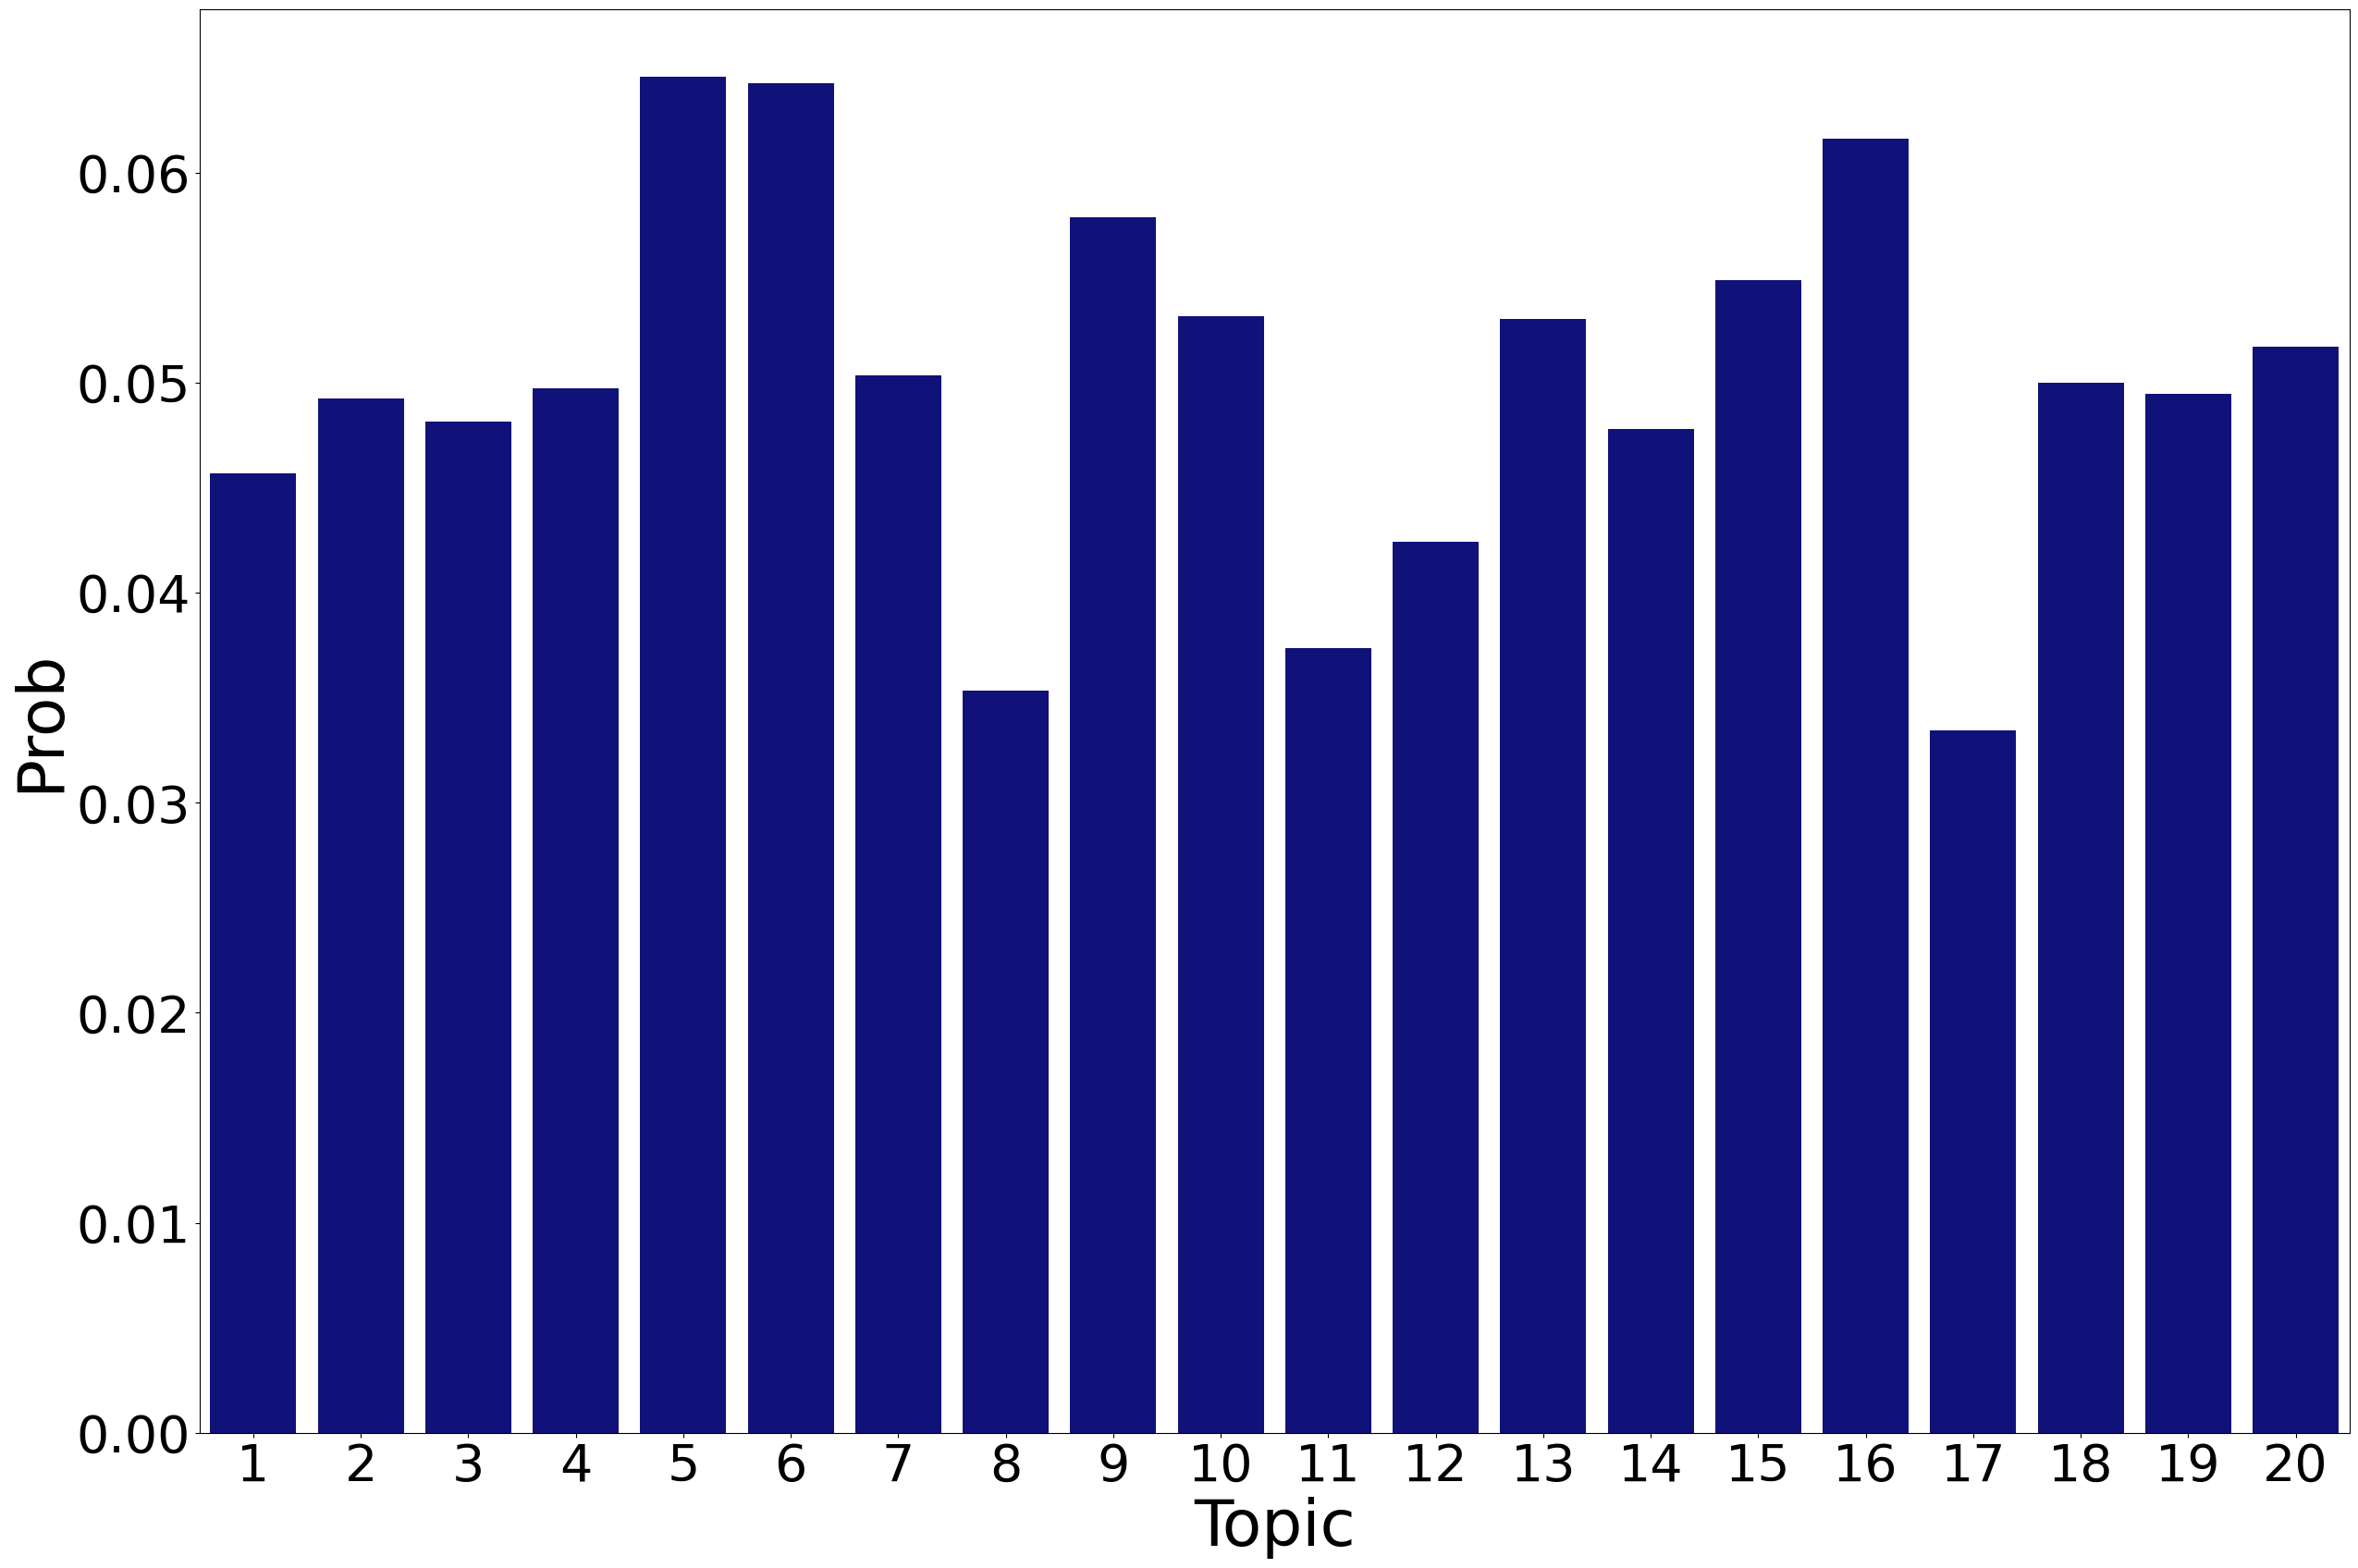

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#各曲の各トピックへの所属確率の算出。(曲数×トピック数)のnumpy
Prob_songs=np.array(model.get_document_topics(corpus,minimum_probability=0))[:,:,1]

#DataFrameに収納
L=[ z for z in range(1,zk+1)]
col_name=list(map(lambda x: "Prob_"+str(x),L))
df_prob=pd.DataFrame(Prob_songs)
df_prob.columns=col_name

#所属確率最大のトピック番号も算出
df_prob["Max"]=df_prob.idxmax(axis=1)
def del_Prob(x):
    return int(x.split("_")[1])
df_prob["Max"]=df_prob["Max"].apply(lambda x : del_Prob(x))

#各トピックの出現確率の算出。曲のトピックへの所属確率を全曲で足して、全トピックで1になるように正規化
df_topic=pd.DataFrame(df_prob.drop("Max",axis=1).sum()/df_prob.drop("Max",axis=1).sum().sum())
df_topic.columns=["Prob"]
df_topic["Topic"]=[ z for z in range(1,zk+1)]

#可視化
plt.figure(figsize = (30,20))
ax= sns.barplot(x="Topic",y="Prob",data=df_topic,color="darkblue")
ax.set_xlabel("Topic",fontsize=50)
ax.set_ylabel("Prob",fontsize=50)
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
plt.show()

In [25]:
topic_word_prob=[]

for z in range(zk):
    word=[]
    prob=[]
    topic = model.show_topic(z,1000) #適当な単語数分

    for t in topic:
        word.append(t[0])
        prob.append(t[1])
        
    df_lda=pd.DataFrame({"word":word,"prob":prob})
    topic_word_prob.append(df_lda)

In [26]:
type(topic_word_prob)

list

In [27]:
topic_word_prob

[    word      prob
 0    bot  0.016989
 1     企画  0.009698
 2     募集  0.009539
 3     )。  0.008947
 4    お願い  0.008745
 ..   ...       ...
 995    児  0.000106
 996    原  0.000106
 997   時代  0.000106
 998  どちら  0.000106
 999   入門  0.000106
 
 [1000 rows x 2 columns],
        word      prob
 0         8  0.014069
 1         6  0.011269
 2         9  0.011269
 3        会社  0.011269
 4       ブログ  0.010513
 ..      ...       ...
 995     DVA  0.000070
 996     303  0.000070
 997      株式  0.000070
 998      すき  0.000070
 999  プログラマー  0.000070
 
 [1000 rows x 2 columns],
         word      prob
 0          級  0.012660
 1      TOEIC  0.011366
 2      アカウント  0.010951
 3          6  0.010714
 4         英語  0.009789
 ..       ...       ...
 995        割  0.000065
 996    フォロワー  0.000065
 997       感想  0.000065
 998       DL  0.000065
 999  Flutter  0.000065
 
 [1000 rows x 2 columns],
     word      prob
 0    ゲーム  0.014151
 1     さん  0.013886
 2      目  0.012664
 3     制作  0.012646
 4     )/  0

In [28]:
for number, topic in enumerate (topic_word_prob):
    print("グループ" + str(number))
    print(topic[:5])
    print("-"*30)
# 各グループを表す単語の上位

グループ0
  word      prob
0  bot  0.016989
1   企画  0.009698
2   募集  0.009539
3   )。  0.008947
4  お願い  0.008745
------------------------------
グループ1
  word      prob
0    8  0.014069
1    6  0.011269
2    9  0.011269
3   会社  0.011269
4  ブログ  0.010513
------------------------------
グループ2
    word      prob
0      級  0.012660
1  TOEIC  0.011366
2  アカウント  0.010951
3      6  0.010714
4     英語  0.009789
------------------------------
グループ3
  word      prob
0  ゲーム  0.014151
1   さん  0.013886
2    目  0.012664
3   制作  0.012646
4   )/  0.009688
------------------------------
グループ4
  word      prob
0    |  0.073575
1    •  0.014472
2    学  0.012698
3    方  0.008914
4   AI  0.007977
------------------------------
グループ5
  word      prob
0   20  0.010150
1    水  0.009313
2   支援  0.008967
3    垢  0.008497
4   )/  0.008280
------------------------------
グループ6
  word      prob
0    0  0.013001
1    R  0.010798
2   機械  0.008883
3   業界  0.008262
4    月  0.008201
------------------------------
グループ7
  word   

# PyLDAvisでの可視化

In [29]:
# !pip install pyLDAvis

In [32]:
#ライブラリーのインポート
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from imp import reload

In [31]:
#PyLDAvisの実装
pyLDAvis.enable_notebook()

vis = gensimvis.prepare(
      model, corpus, dictionary, n_jobs = 1, sort_topics = False
      )

pyLDAvis.display(vis)